# XJTLU INT104 - Feature Selection

## Environment Configuration

In this experiment, a Python package named "openpyxl" will be used. In this Python script, a separate block will run to ensure that the package is properly installed. On your own machine, once the package is installed, this particular code block should be void.

In [1]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install('openpyxl')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 28.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


## Data Loading

We now load the data file into Python environment. A class named "Data Frame" in "Pandas" is set up. The first column is the index of student hence is removed once data loaded. A box plot is drawn to show the distribution of variables.

     Group  E1  E2  E3  E4
0        3  82  71  83  81
1        1  83  60  94  81
2        1  79  72  94  80
3        1  80  66  94  80
4        1  79  69  94  80
..     ...  ..  ..  ..  ..
619      1   0   0  67  10
620      4   0   0  61   9
621      4   0   0  44   7
622      2   0   0  44   7
623      2   0   0  44   7

[624 rows x 5 columns]


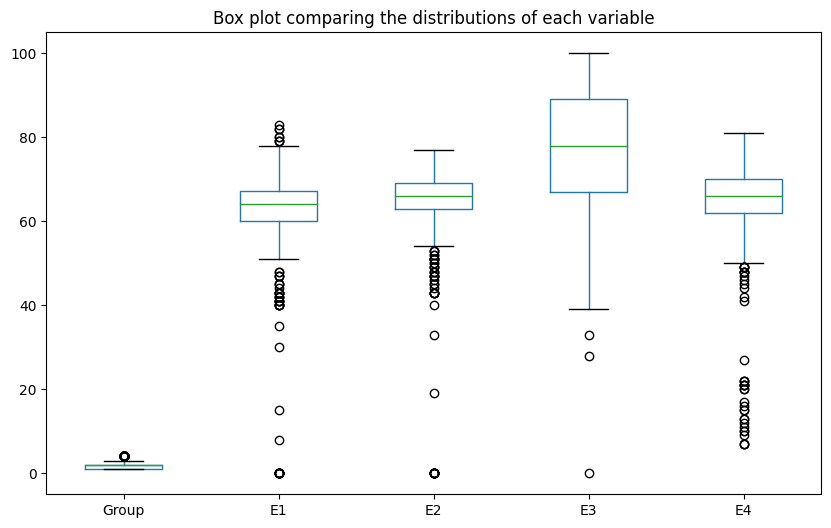

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_excel('sample_data.xlsx')

print(dataframe)

# Obtain the variable name of variables and labels
column_names = dataframe.columns.tolist()
class_names = column_names[0]
variable_names = column_names[1:5]

# Draw a diagram of data distribution
plt.figure(figsize=(10, 6))
dataframe.boxplot(grid=False)
plt.title('Box plot comparing the distributions of each variable')
plt.show()

Now, you could try to observe the potential correlations between a set of variables and a certain set of classes. 

> What is the aim of the observation?

In [21]:
x_axis_1 = 'E3'

In [17]:
y_axis_1 = 'E2'

In [9]:
class_1 = 'Group'

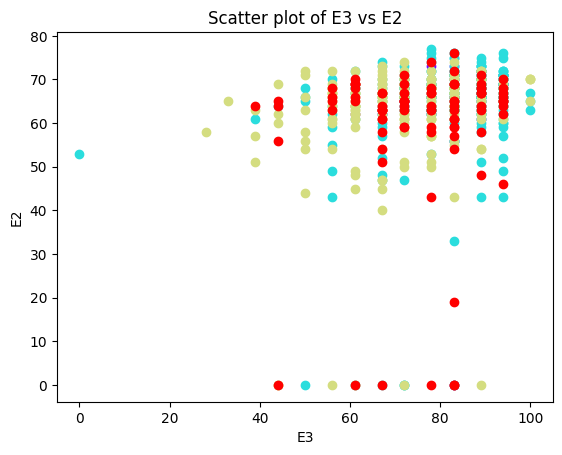

In [23]:
import numpy as np

classes_1 = dataframe[class_1].unique()  # get the unique classes
colors_1 = plt.cm.rainbow(np.linspace(0, 1, len(classes_1)))  # generate a color for each class

for i, class_type in enumerate(classes_1):
    plt.scatter(
        dataframe.loc[dataframe[class_1]==class_type, x_axis_1],
        dataframe.loc[dataframe[class_1]==class_type, y_axis_1],
        color=colors_1[i]  # define the color for each class in the scatter plot
    )

plt.xlabel(x_axis_1)
plt.ylabel(y_axis_1)
plt.title('Scatter plot of ' + x_axis_1 + ' vs ' + y_axis_1)
plt.show()

## Data Scaled

The original data distribution is very hard to observe. The data is then scaled for easier observation. A standard way is to remove the differences of mean and standardise the stand deviation to 1. The following diagram has shown the distribution of scaled features.

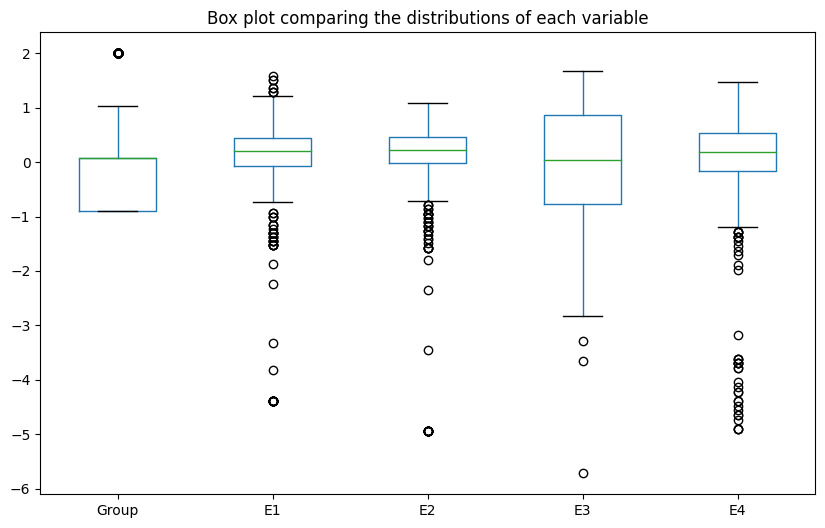

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(dataframe), columns=dataframe.columns)

plt.figure(figsize=(10, 6))
scaled_df.boxplot(grid=False)
plt.title('Box plot comparing the distributions of each variable')
plt.show()

Now let's observe the data again. 

> Does the scaling process impact observation? If not, think about why scaling matters?

In [27]:
x_axis_2 = 'E4'

In [29]:
y_axis_2 = 'E3'

In [31]:
class_2 = 'Group'

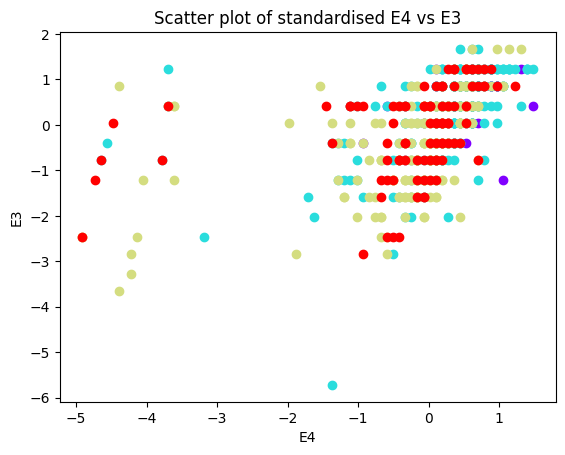

In [35]:
classes_2 = dataframe[class_2].unique()  # get the unique classes
colors_2 = plt.cm.rainbow(np.linspace(0, 1, len(classes_2)))  # generate a color for each class

for i, class_type in enumerate(classes_2):
    plt.scatter(
        scaled_df.loc[dataframe[class_2]==class_type, x_axis_2],
        scaled_df.loc[dataframe[class_2]==class_type, y_axis_2],
        color=colors_2[i]  # define the color for each class in the scatter plot
    )

plt.xlabel(x_axis_2)
plt.ylabel(y_axis_2)
plt.title('Scatter plot of standardised ' + x_axis_2 + ' vs ' + y_axis_2)
plt.show()

## Principle Component Analysis

Next, we will observe the distribution of PCA coefficients. We firstly do PCA analysis. The following diagram shows the distribution of PCA coefficients, from which you could see the significance of PCA coefficients is dramatically decreased from the most important components to the least important components.

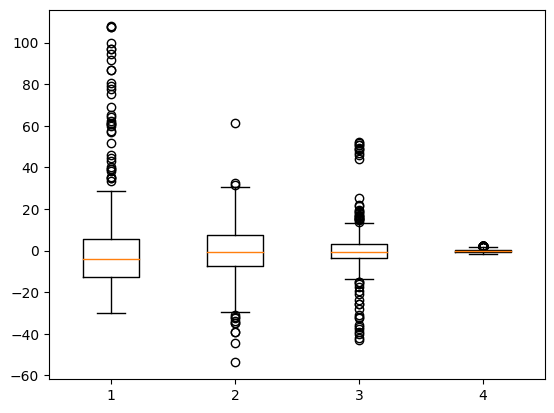

In [39]:
from sklearn.decomposition import PCA

df_numeric = dataframe.select_dtypes(include=[np.number])

pca = PCA(n_components=4, svd_solver='arpack')
df_pca = pca.fit_transform(df_numeric)

plt.boxplot(df_pca)
plt.show()

Now please try yourself to find the best way to distinguish students from different groups. 

In [63]:
dim_1 = 4

In [65]:
dim_2 = 1

In [49]:
class_column = 'Group'

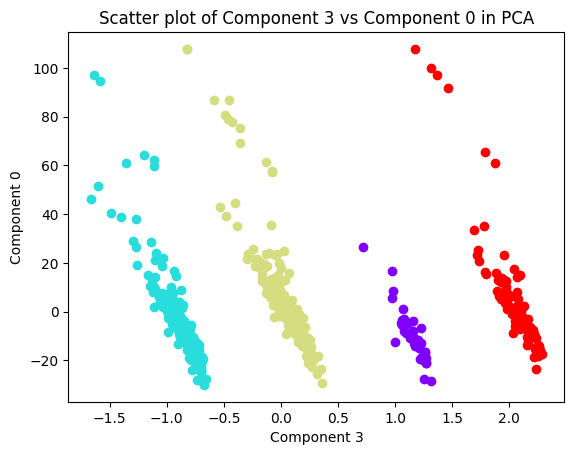

In [67]:
dim_1 = int(dim_1) - 1
dim_2 = int(dim_2) - 1

classes = dataframe[class_column].unique()  # get the unique classes
colors = plt.cm.rainbow(np.linspace(0, 1, len(classes)))  # generate a color for each class

for i, class_type in enumerate(classes):
    plt.scatter(df_pca[dataframe[class_column]==class_type,dim_1],df_pca[dataframe[class_column]==class_type,dim_2],color=colors[i])

plt.xlabel('Component ' + str(dim_1))
plt.ylabel('Component ' + str(dim_2))
plt.title('Scatter plot of Component ' + str(dim_1) + ' vs Component ' + str(dim_2) + ' in PCA')
plt.show()

You may find some combinations of components are very good at classification.  How can you interpret your findings as a piece of knowledge? We could show the components that we selected for visualisation e.g.,

In [69]:
pca_components = pd.DataFrame([pca.components_[dim_1], pca.components_[dim_2]],columns=dataframe.columns, index=['Component ' + str(dim_1), 'Component ' + str(dim_2)])
print(pca_components)

                Group        E1        E2        E3        E4
Component 3  0.999823 -0.007516  0.004201  0.006183  0.015533
Component 0  0.008117 -0.609065 -0.415317 -0.396441 -0.547102


> This finding basically tells us that we are using existing class information, which assures the classification will be success. In practice, what should we do when a method of feature extraction is proposed?

## t-SNE Observation

A very famous way to observe high-dimensional data is t-SNE, which maps high-dimensional data into low-dimensional ones.  Now let's observe how data is distributed given different sets of features.

> How will evaluate the sets of features that are used as features for classifying the student?

In [81]:
features = ['E1','E2','E3','E4']

In [83]:
class_4 = 'Group'

/root/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/root/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


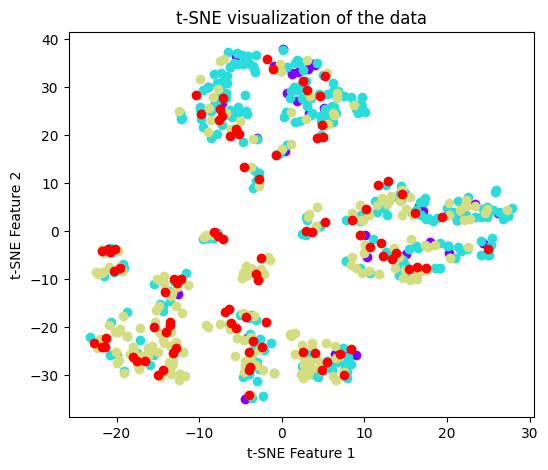

In [85]:
from sklearn.manifold import TSNE

classes_4 = dataframe[class_4].unique()  # get the unique classes
colors_4 = plt.cm.rainbow(np.linspace(0, 1, len(classes_4)))  # generate a color for each class

data_features = dataframe[features[:]]

numerical_df = data_features.select_dtypes(include=[np.number])

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(numerical_df)

plt.figure(figsize=(6, 5))

for i, class_type in enumerate(classes_4):
    plt.scatter(
        tsne_results[dataframe[class_4]==class_type,0],
        tsne_results[dataframe[class_4]==class_type,1],
        color=colors_4[i])

plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('t-SNE visualization of the data')
plt.show()

One potential method for evaluating the performance of selected features is to analyze the ratio of the average distance between classes and the average distance within classes. Our goal is to increase the distance between two sample classes while reducing the distance between samples within each class. Consequently, a high ratio value is anticipated.

In [87]:
from scipy.spatial import distance

container = []
dim = len(classes_4)
avg_mat = np.zeros((dim,dim))
ratio = np.ones((dim,dim))

for i, class_type in enumerate(classes_4):
    container.append(tsne_results[dataframe[class_4]==class_type,:])

for i, test1 in enumerate(container):
    for j, test2 in enumerate(container):
        if i == j:
            dm = distance.pdist(test1)
            avg = np.mean(dm)
        else:
            dm = distance.cdist(test1,test2)
            avg = np.mean(dm)
        avg_mat[i,j] = avg

for i in range(len(classes_4)):
    ratio[i,:] = avg_mat[i,:] / avg_mat[i,i]

np.set_printoptions(precision=4)
print('The ratio of inter-class distance over intra-class distance for all classes are shown as: ')
print(ratio)

mask = ratio != 1
average = ratio[mask].mean()
print('The average inter-class distance ratio is ' + str(average) + ' where a larger number indicates a better performance.')

The ratio of inter-class distance over intra-class distance for all classes are shown as: 
[[1.     1.0077 1.1388 1.0943]
 [0.9902 1.     1.0817 1.0405]
 [1.2289 1.1879 1.     1.0164]
 [1.1559 1.1185 0.9949 1.    ]]
The average inter-class distance ratio is 1.0879824044959563 where a larger number indicates a better performance.


- Now try yourself to select the best feature set.

- You may also want to try other features (e.g. the PCA of marks for each question)

- Find other ways to evaluate the performance of feature set and state the advantages and disadvantages of your method.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=530324ac-020c-456b-8be5-a3fafffa0d0e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>